In [11]:
import os   #linar regression for binary classes
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, export_graphviz


from sklearn.datasets import make_blobs,load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import graphviz
import matplotlib.image as mpimg

In [12]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 1500x600 with 0 Axes>

In [13]:
def fn_plot_decision_boundary(pred_func,X,y,ax=None):
    '''
    Attrib:
        pred_func : function based on predict method of the classifer
        x: feature matrix
        y: targets
        ax:Matplotlib axis object
    Return:
        None
    '''
    #if ax is not supplied pick content of graph
    if ax is None:
        ax=plt.gca()

    # set min and max values and give it some padding
    xMin,xMax = X[:,0].min() - .05, X[:,0].max()  + .05
    yMin,yMax = X[:,1].min() - .05, X[:,1].max()  + .05
    
    #grid size for mesh grid
    h=0.05

    #generate a grid of points with distance'h between them
    xx , yy = np.meshgrid(np.arange(xMin , xMax , h) , np.arange(yMin , yMax , h))

    #predict the function value for the whole grid
    Z = pred_func.predict(np.c_[xx.ravel(),yy.ravel()])

    #make its shape same as that of xx
    Z = Z.reshape(xx.shape)

    #now we have Z value corresponding ti each of the combination of xx and yy
    #plot the contour and training examples
    ax.contourf(xx , yy , Z ,cmap=CMAP , alpha=0.6)

    #plot the points as well
    ax.scatter(X[:,0],X[:,1], c=y,cmap=CMAP, edgecolors='black')

In [14]:
decision_tree = graphviz.Digraph(node_attr ={'shape' :'box'},
                                  edge_attr={'labeldistance':'10.5'}, 
                                  format = 'png')

decision_tree.node('0','Has Feathers')
decision_tree.node('1','Can Fly')
decision_tree.node('2','Has Fins')
decision_tree.node('3','Hwaks')
decision_tree.node('4','Penguins')
decision_tree.node('5','Dolphin')
decision_tree.node('6','Bear')


decision_tree.edge('0','1',label = 'True')
decision_tree.edge('0','2',label = 'False')
decision_tree.edge('1','3',label = 'True')
decision_tree.edge('1','4',label = 'False')
decision_tree.edge('2','5',label = 'True')
decision_tree.edge('2','6',label = 'False')

decision_tree.render('decision_tree')

'decision_tree.png'

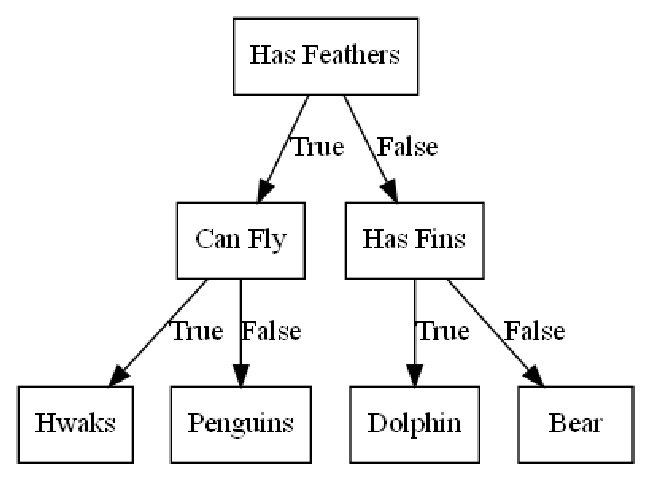

In [15]:
fig,ax = plt.subplots() # instantiate figure & image

ax.imshow(mpimg.imread('decision_tree.png')); # display image read by mpimg

ax.set_axis_off(); # no axis required


## Generate Data

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,euclidean_distances
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.datasets import make_blobs,load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)

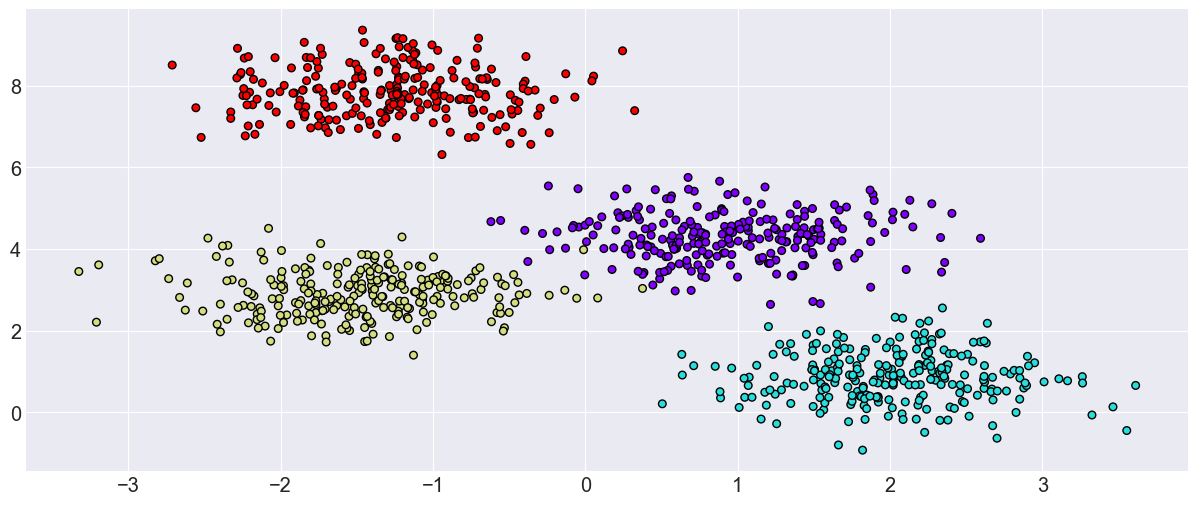

In [7]:
X,y = make_blobs(n_samples =  N_SAMPLES,centers=4, random_state=0,cluster_std=0.6)

fig,ax = plt.subplots() # instantiate figure & image

ax.scatter(X[:,0],X[:,1],c=y, s=30,cmap=CMAP,edgecolors='k');

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

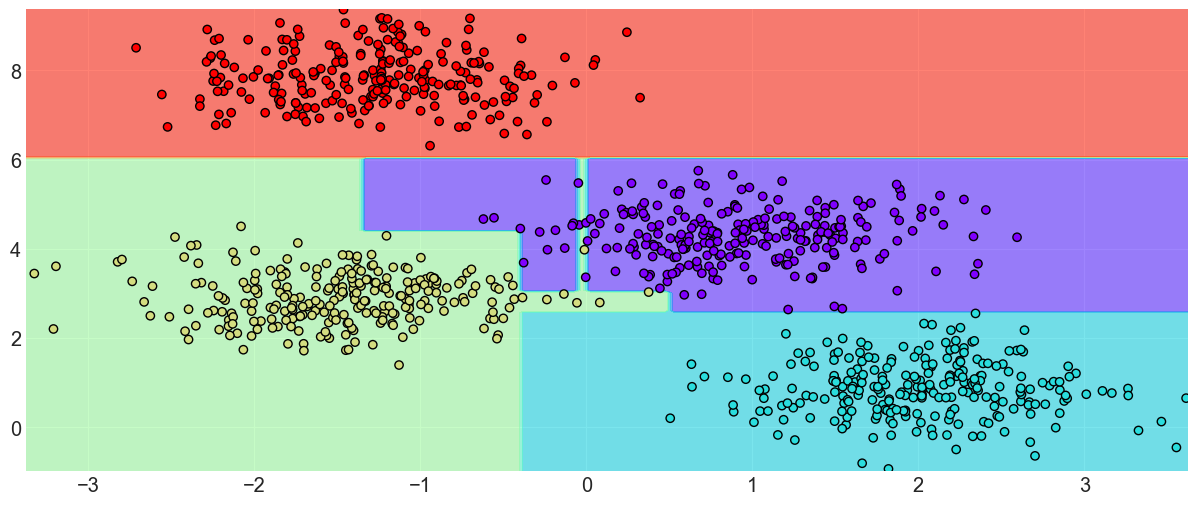

In [9]:
fn_plot_decision_boundary(clf,X,y)

In [10]:
export_graphviz(clf,out_file=os.path.join(outDir,'tree.dot'),filled=True)


FileNotFoundError: [Errno 2] No such file or directory: 'output\\tree.dot'

In [ ]:
with open(os.path.join(outDir,'tree.dot'))as f:
    dot_graph = f.read()

img = graphviz.Source(dot_graph)

! dot -Tpng output/tree.dot -o output/tree.png

In [ ]:
data = load_breast_cancer()

X_train , X_test, y_train, y_test = train_test_split(data.data,data.target,
                                                     stratify=data.target,
                                                    random_state = RANDOM_STATE)

In [ ]:
X_train

In [ ]:
fig , axes = plt.subplots(1,3)

for count, kernel in enumerate(['linear','rbf','poly']):
    clf=SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f'SVC : kernel {kernel: <7}', end = '|')
    print(f'F1 Score : {f1_score(y_test,y_pred,average="weighted")}')

    cm = confusion_matrix(y_test,y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=digit.target_names)

    disp.plot(ax = axes[count],cmap = plt.cm.Blues, colorbar =False)
    axes[count].grid()
    axes[count].set_title(f'kernel : {kernel}')
    

## Linear Models and non-linear  data

In [ ]:
X,y = make_blobs(centers=4,random_state = RANDOM_STATE)

plt.scatter(X[:,0],X[:,1], c=y, cmap = CMAP);

In [ ]:
y = y % 2
plt.scatter(X[:,0],X[:,1], c=y, cmap = CMAP);



In [ ]:
linear_svm = LinearSVC(dual = 'auto', random_state = RANDOM_STATE)
linear_svm.fit(X,y)

fn_plot_decision_boundary(linear_svm, X, y)


In [ ]:
X_new = np.hstack([X,X[:,1:]**2])
X.shape,X_new.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

ax = plt.figure().add_subplot(projection = '3d')

ax.scatter(X_new[:,0],X_new[:,1], X_new[:,2], c = y,cmap = CMAP)

ax.view_init(elev=30, azim = 40, roll =0) # changing the view point

In [ ]:
linear_svm_3d = LinearSVC(dual = 'auto', random_state = RANDOM_STATE)
linear_svm_3d .fit(X_new,y)

coef,intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
coef,intercept

In [ ]:
ax = plt.figure(figsize =(9,9)).add_subplot(projection = '3d')

ax.scatter(X_new[:,0],X_new[:,1], X_new[:,2], c = y,cmap = CMAP)

xx = np.linspace(X_new[:,0].min() -2,X_new[:,0].max() +2,50)

yy = np.linspace(X_new[:,1].min() -2,X_new[:,1].max() +2,50)

XX,YY = np.meshgrid(xx,yy)

ZZ = (coef[0] * XX + coef[1]* YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.8)

ax.view_init(elev=30, azim = 40, roll =0)

In [ ]:
# Parameter Tuning
# -Kernel
# -c
# -Gamma

In [ ]:
iris_features = ['sepal length',
                'sepal width',
                'petal lenght',
                'petal width','target'] # create list containig all column names

iris_df = pd.read_csv(("C:\\Users\\duasp\\input\\iris.csv"),
                     skiprows = 1, # ignore 1st row
                      sep = ',', # using seperator as,
                     header = None, # no column names
                     names = iris_features) # use these column names

target_names = ['setosa','versicolor','virginica']

formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])

iris_df.head()  

In [ ]:
features_df = iris_df.drop('target',axis = 1)
labels = iris_df.target

In [ ]:
features_df.shape

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_feat = pca.fit_transform(features_df)

pca_feat.shape


# Parameter C
Range 0.001,1,1000

In [ ]:
fig = plt.figure(figsize = (15,4))

C_values = [0.001,1,1000]

i = 1

for C in C_values:
    clf = SVC(kernel = 'linear',C=C)
    clf.fit(pca_feat,labels)
    y_pred = clf.predict(pca_feat)

    ax = fig.add_subplot(1,3,i)
    ax.set_title(f'C: {C}')
    i += 1
    fn_plot_decision_boundary(clf,pca_feat,labels, ax = ax)

## Kernel

In [ ]:
fig = plt.figure(figsize = (15,4))

kernels= ['linear','rbf','poly']
i = 1

for knl in kernels:
    clf = SVC(kernel = 'linear',C=C)
    clf.fit(pca_feat,labels)
    y_pred = clf.predict(pca_feat)

    ax = fig.add_subplot(1,3,i)
    ax.set_title(f'kernel: {knl}')
    i += 1
    fn_plot_decision_boundary(clf,pca_feat,labels, ax = ax)

## Gamma
-1e-3

-1.0

-auto

In [ ]:
fig = plt.figure(figsize = (15,4))

gammas= [1e-3,1.0,'auto']

i = 1

for g in gammas:
    clf = SVC(kernel = 'linear',gamma=g)
    clf.fit(pca_feat,labels)
    y_pred = clf.predict(pca_feat)

    ax = fig.add_subplot(1,3,i)
    ax.set_title(f'Gamma: {g}')
    i += 1
    fn_plot_decision_boundary(clf,pca_feat,labels, ax = ax)

# Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 1)

clf.fit(features_df, labels)

y_pred = clf.predict(features_df)

print(np.all(labels == y_pred))

In [ ]:
confusion_matrix(labels,y_pred)

In [ ]:
# def fn_knn_classification(X_tarin, y_train,X_test,n_neighbors=1):

#     dist = euclidean_distances(X_train, X_test)
#     closest = np.argsort(dist, axis = 0)

#     for x, neighbors in zip(X_test,closest.T):
#         for neighbor in neighbors[:n_neighbors]:
#             plt.arrow(x[0],x[1],X[neighbor,0]-x[0],X[neighbor,1]-x[1],
#                     head_width = 0, fc = 'k',ec = 'k')

#     clf = KNeighborsClassifier(n_neighbors = n_neighbors)
#     clf.fit(X_train, y_train)
#     plt.scatter(X_train[:,0], X_train[:,1], s = 30, c = y_train,
#                marker = '*',
#                cmap = CMAP)
#     plt.scatter(X_test[:,0], X_test[:,1], s = 30, c = clf.predict(X_test),
#                marker = '*',
#                cmap = CMAP)

    

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features_df,labels,test_size = TEST_SIZE, stratify = labels, random_state = RANDOM_STATE)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components = 2)

X_train2 = lda.fit_transform(X_train,y_train)

X_test2 = lda.transform(X_test)

In [ ]:
n_neighbors=1

clf = KNeighborsClassifier(n_neighbors = n_neighbors)

clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

dist = euclidean_distances(X_train2, X_test2)

closest = np.argsort(dist, axis = 0)

In [ ]:
plt.scatter(X_train2[:,0], X_train2[:,1], s = 100, c = y_train,
           cmap = CMAP,edgecolors = 'k')
plt.scatter(X_test2[:,0], X_test2[:,1], s = 100, c = clf.predict(X_test2),
           marker = '*',
           cmap = CMAP,edgecolors = 'k')


for x, neighbors in zip(X_test2,closest.T):
    for neighbor in neighbors[:n_neighbors]:
        plt.arrow(x[0],x[1],X_train2[neighbor,0]-x[0],X_train2[neighbor,1]-x[1],
                head_width = 0, fc = 'k',ec = 'k')


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score?

In [ ]:
n_neighbors=3

clf = KNeighborsClassifier(n_neighbors = n_neighbors)

clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

dist = euclidean_distances(X_train2, X_test2)

closest = np.argsort(dist, axis = 0)


In [ ]:
plt.scatter(X_train2[:,0], X_train2[:,1], s = 100, c = y_train,
           cmap = CMAP,edgecolors = 'k')
plt.scatter(X_test2[:,0], X_test2[:,1], s = 100, c = clf.predict(X_test2),
           marker = '*',
           cmap = CMAP,edgecolors = 'k')


for x, neighbors in zip(X_test2,closest.T):
    for neighbor in neighbors[:n_neighbors]:
        plt.arrow(x[0],x[1],X_train2[neighbor,0]-x[0],X_train2[neighbor,1]-x[1],
                head_width = 0, fc = 'k',ec = 'k')


### Regression Tree

In [ ]:
inpDir = '../input'

In [ ]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

In [ ]:
ram_prices = pd.read_csv(os.path.join(inpDir, 'ram_price.csv'))

fig, ax = plt.subplots()

ax.semilogy(ram_prices.date, ram_prices.price)

ax.set_xlabel('year')
ax.set_ylabel('Price')

In [ ]:
ram_prices = pd.read_csv(os.path.join(inpDir, 'ram_price.csv'))

fig, ax = plt.subplots()

ax.semilogy(ram_prices.date, ram_prices.price)

ax.set_xlabel('year')
ax.set_ylabel('Price')

In [ ]:
ram_prices = pd.read_csv(os.path.join(inpDir, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)

plt.xlabel('Year')

plt.ylabel('Price')

In [ ]:
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date<2000] #before 2000 in train
data_test = ram_prices[ram_prices.date>=2000] #after 2000 in testing

X_train = data_train.date.to_numpy()[:,np.newaxis]
y_train = np.log(data_train.price)
X_test = data_test.date.to_numpy()[:,np.newaxis]
y_test = np.log(data_test.price)
tree = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
X_all = ram_prices.date.to_numpy()[:,np.newaxis]
y_pred = tree.predict(X_all)
y_reg = linear_reg.predict(X_all)
price_tree = np.exp(y_pred)
price_reg = np.exp(y_reg)

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(data_train.date, data_train.price, label = 'Train')
ax.semilogy(data_test.date, data_test.price, label = 'Test')
ax.semilogy(ram_prices.date, price_tree, label = 'Tree',lw = 2)
ax.semilogy(ram_prices.date, price_reg, label = 'Tree',lw = 2)

plt.legend()